In [1]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# !git clone https://github.com/taehojo/data.git

Cloning into 'data'...


In [3]:
df_data = pd.read_csv('./data/pima-indians-diabetes3.csv')

df_X = df_data.iloc[:,0:8]
df_Y = df_data.iloc[:,8]

In [4]:
c_ss = StandardScaler()
df_scaled_X = pd.DataFrame(c_ss.fit_transform(df_X), columns= df_X.columns)

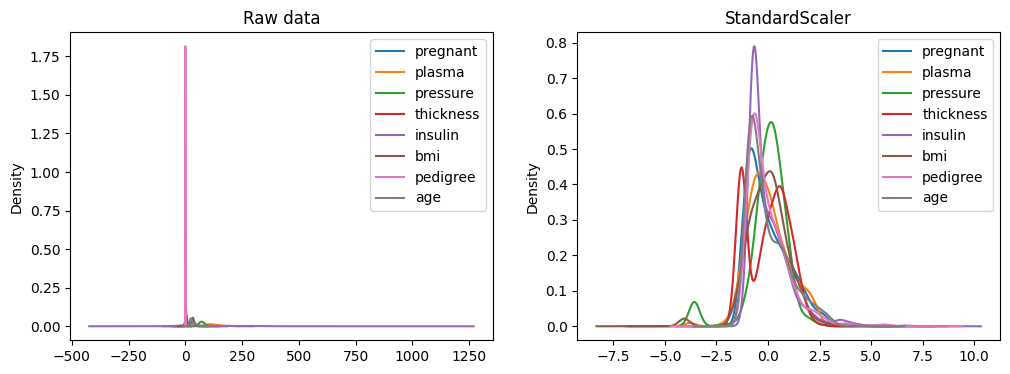

In [5]:
fig, ax = plt.subplots(1,2,figsize=(12,4))
df_X.plot(kind='kde', title='Raw data', ax=ax[0])
df_scaled_X.plot(kind='kde', title='StandardScaler', ax=ax[1])
plt.show()

In [8]:
df_X_train, df_X_test, df_Y_train, df_Y_test = train_test_split(df_scaled_X, df_Y, test_size=0.25, random_state=0)

In [9]:
## 결정트리

from sklearn.tree import DecisionTreeClassifier

c_dt = DecisionTreeClassifier()
c_dt.fit(df_X_train, df_Y_train)
df_y_pred = c_dt.predict(df_X_test)

In [10]:
c_skf = StratifiedKFold(n_splits= 10, shuffle= True)
dict_accuracies = cross_val_score(estimator= c_dt, X=df_X_train, y= df_Y_train, cv = c_skf)

In [11]:
print("Accuracy: {:.2f} %".format(dict_accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(dict_accuracies.std()* 100))

Accuracy: 67.18 %
Standard Deviation: 4.63 %


In [12]:
## 랜덤 포레스트

from sklearn.ensemble import RandomForestClassifier

c_rf = RandomForestClassifier(n_estimators= 50)
c_rf.fit(df_X_train, df_Y_train)

RandomForestClassifier(n_estimators=50)

In [13]:
df_y_pred = c_rf.predict(df_X_test)

In [14]:
c_skf = StratifiedKFold(n_splits= 10, shuffle= True)
dict_accuracies = cross_val_score(estimator= c_rf, X=df_X_train,y= df_Y_train, cv= c_skf)

In [15]:
print("Accuracy: {:.2f} %".format(dict_accuracies.mean()* 100))
print("Standard Deviation: {:.2f} %".format(dict_accuracies.std()* 100))

Accuracy: 72.91 %
Standard Deviation: 4.36 %


In [16]:
## 가우시안 나이브 베이즈 분류기

from sklearn.naive_bayes import GaussianNB

c_gnb = GaussianNB()
c_gnb.fit(df_X_train, df_Y_train)

GaussianNB()

In [17]:
df_y_pred = c_gnb.predict(df_X_test)

In [18]:
c_skf = StratifiedKFold(n_splits= 10, shuffle= True)
dict_accuracies = cross_val_score(estimator= c_gnb, X=df_X_train,y= df_Y_train, cv= c_skf)

In [19]:
print("Accuracy: {:.2f} %".format(dict_accuracies.mean()* 100))
print("Standard Deviation: {:.2f} %".format(dict_accuracies.std()* 100))

Accuracy: 75.36 %
Standard Deviation: 6.50 %


In [20]:
## K nearest neighbor

from sklearn.neighbors import KNeighborsClassifier

c_kn = KNeighborsClassifier()
c_kn.fit(df_X_train, df_Y_train)

KNeighborsClassifier()

In [21]:
df_y_pred = c_kn.predict(df_X_test)

In [22]:
c_skf = StratifiedKFold(n_splits= 10, shuffle= True)
dict_accuracies = cross_val_score(estimator= c_kn, X=df_X_train,y= df_Y_train, cv= c_skf)

In [23]:
print("Accuracy: {:.2f} %".format(dict_accuracies.mean()* 100))
print("Standard Deviation: {:.2f} %".format(dict_accuracies.std()* 100))

Accuracy: 71.71 %
Standard Deviation: 3.24 %


In [25]:
## 에이다 부스트 분류기

from sklearn.ensemble import AdaBoostClassifier

c_ab = AdaBoostClassifier()
c_ab.fit(df_X_train, df_Y_train)

AdaBoostClassifier()

In [26]:
df_y_pred = c_ab.predict(df_X_test)

In [27]:
c_skf = StratifiedKFold(n_splits= 10, shuffle= True)
dict_accuracies = cross_val_score(estimator= c_ab, X=df_X_train,y= df_Y_train, cv= c_skf)

In [28]:
print("Accuracy: {:.2f} %".format(dict_accuracies.mean()* 100))
print("Standard Deviation: {:.2f} %".format(dict_accuracies.std()* 100))

Accuracy: 73.96 %
Standard Deviation: 4.12 %


In [29]:
## 이차 판별 분석 분류기

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

c_qda = QuadraticDiscriminantAnalysis()
c_qda.fit(df_X_train, df_Y_train)

QuadraticDiscriminantAnalysis()

In [35]:
df_y_pred = c_qda.predict(df_X_test)

In [36]:
c_skf = StratifiedKFold(n_splits= 10, shuffle= True)
dict_accuracies = cross_val_score(estimator= c_qda, X=df_X_train,y= df_Y_train, cv= c_skf)

In [37]:
print("Accuracy: {:.2f} %".format(dict_accuracies.mean()* 100))
print("Standard Deviation: {:.2f} %".format(dict_accuracies.std()* 100))

Accuracy: 73.44 %
Standard Deviation: 5.76 %


In [42]:
## 서포트 벡터 머신

from sklearn.svm import SVC

c_svc = SVC(kernel='linear')
c_svc.fit(df_X_train, df_Y_train)

SVC(kernel='linear')

In [43]:
df_y_pred = c_svc.predict(df_X_test)

In [44]:
c_skf = StratifiedKFold(n_splits= 10, shuffle= True)
dict_accuracies = cross_val_score(estimator= c_svc, X=df_X_train,y= df_Y_train, cv= c_skf)

In [45]:
print("Accuracy: {:.2f} %".format(dict_accuracies.mean()* 100))
print("Standard Deviation: {:.2f} %".format(dict_accuracies.std()* 100))

Accuracy: 74.29 %
Standard Deviation: 7.96 %


In [46]:
## 서포트 벡터 머신 - RBF커널

from sklearn.svm import SVC

c_svc = SVC(kernel='rbf')
c_svc.fit(df_X_train, df_Y_train)

SVC()

In [47]:
df_y_pred = c_svc.predict(df_X_test)

In [48]:
c_skf = StratifiedKFold(n_splits= 10, shuffle= True)
dict_accuracies = cross_val_score(estimator= c_svc, X=df_X_train,y= df_Y_train, cv= c_skf)

In [49]:
print("Accuracy: {:.2f} %".format(dict_accuracies.mean()* 100))
print("Standard Deviation: {:.2f} %".format(dict_accuracies.std()* 100))

Accuracy: 76.23 %
Standard Deviation: 5.73 %


In [50]:
## 보팅 분류기

from sklearn.ensemble import VotingClassifier

c_clf1 = AdaBoostClassifier()
c_clf2 = RandomForestClassifier()
c_clf3 = SVC(kernel='linear')
c_vot = VotingClassifier(estimators=[('lr', c_clf1),('rf',c_clf2),('gnb',c_clf3)])
c_vot.fit(df_X_train, df_Y_train)

VotingClassifier(estimators=[('lr', AdaBoostClassifier()),
                             ('rf', RandomForestClassifier()),
                             ('gnb', SVC(kernel='linear'))])

In [52]:
df_y_pred = c_vot.predict(df_X_test)

In [53]:
c_skf = StratifiedKFold(n_splits= 10, shuffle= True)
dict_accuracies = cross_val_score(estimator= c_vot, X=df_X_train,y= df_Y_train, cv= c_skf)

In [54]:
print("Accuracy: {:.2f} %".format(dict_accuracies.mean()* 100))
print("Standard Deviation: {:.2f} %".format(dict_accuracies.std()* 100))

Accuracy: 75.18 %
Standard Deviation: 3.14 %


In [58]:
## 배깅 분류기

from sklearn.ensemble import BaggingClassifier

c_bag = BaggingClassifier(estimator=SVC(kernel='rbf'), n_estimators= 10)
c_bag.fit(df_X_train, df_Y_train)

BaggingClassifier(estimator=SVC())

In [59]:
df_y_pred = c_bag.predict(df_X_test)

In [60]:
c_skf = StratifiedKFold(n_splits= 10, shuffle= True)
dict_accuracies = cross_val_score(estimator= c_bag, X=df_X_train,y= df_Y_train, cv= c_skf)

In [61]:
print("Accuracy: {:.2f} %".format(dict_accuracies.mean()* 100))
print("Standard Deviation: {:.2f} %".format(dict_accuracies.std()* 100))

Accuracy: 75.33 %
Standard Deviation: 3.29 %


In [71]:
from sklearn.ensemble import GradientBoostingClassifier

c_gb = GradientBoostingClassifier()
c_gb.fit(df_X_train, df_Y_train)

GradientBoostingClassifier()

In [72]:
df_y_pred = c_gb.predict(df_X_test)

In [73]:
c_skf = StratifiedKFold(n_splits= 10, shuffle= True)
dict_accuracies = cross_val_score(estimator= c_gb, X=df_X_train,y= df_Y_train, cv= c_skf)

In [74]:
print("Accuracy: {:.2f} %".format(dict_accuracies.mean()* 100))
print("Standard Deviation: {:.2f} %".format(dict_accuracies.std()* 100))

Accuracy: 73.59 %
Standard Deviation: 6.03 %


In [75]:
list_classifiers = [DecisionTreeClassifier(),
                    RandomForestClassifier(),
                    GaussianNB(),
                    KNeighborsClassifier(),
                    SVC(kernel='linear'),
                    SVC(kernel='rbf'),
                    AdaBoostClassifier(),
                    QuadraticDiscriminantAnalysis(),
                    VotingClassifier(estimators=[('1', AdaBoostClassifier()),
                                                 ('2', RandomForestClassifier()),
                                                 ('3', SVC(kernel='linear'))]),
                    BaggingClassifier(estimator=c_clf3, n_estimators=10),
                    GradientBoostingClassifier()]

In [76]:
list_classifier_names = ['D_tree',
                         'RF',
                         'GNB',
                         'KNN',
                         'Ada',
                         'QDA',
                         'SVM_l',
                         'SVM_k',
                         'Voting',
                         'Bagging',
                         'Grad_Boost']

In [77]:
list_model_accuracies = []
list_model_means = []
list_model_names = []

classifier_data = zip(list_classifier_names, list_classifiers)

for classifier_name, classifier in classifier_data:
    c_skf = StratifiedKFold(n_splits= 10, shuffle= True)
    dict_accuracies = cross_val_score(classifier, X=df_X_train,y= df_Y_train, cv= c_skf)
    
    print("Mean accuracy of", classifier_name, ": {:.2f} %".format(dict_accuracies.mean() * 100))
    
    list_model_accuracies.append(dict_accuracies)
    list_model_names.append(classifier_name)
    list_model_means.append(dict_accuracies.mean() * 100)

Mean accuracy of D_tree : 67.70 %
Mean accuracy of RF : 74.64 %
Mean accuracy of GNB : 75.54 %
Mean accuracy of KNN : 72.92 %
Mean accuracy of Ada : 75.54 %
Mean accuracy of QDA : 75.18 %
Mean accuracy of SVM_l : 72.05 %
Mean accuracy of SVM_k : 73.45 %
Mean accuracy of Voting : 75.17 %
Mean accuracy of Bagging : 74.83 %
Mean accuracy of Grad_Boost : 73.25 %


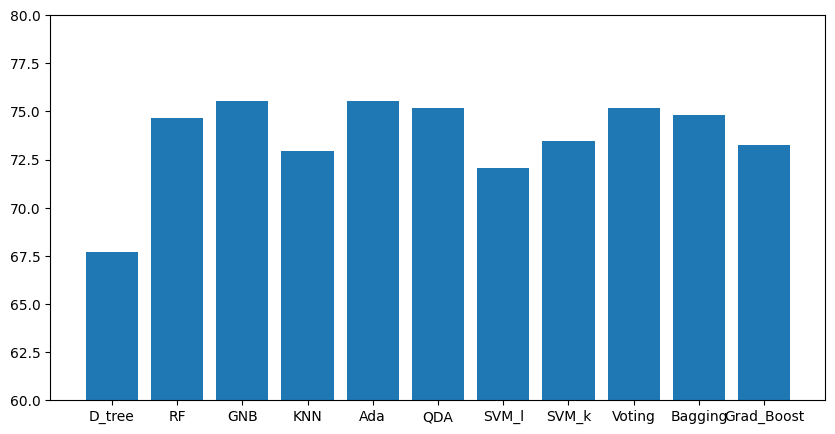

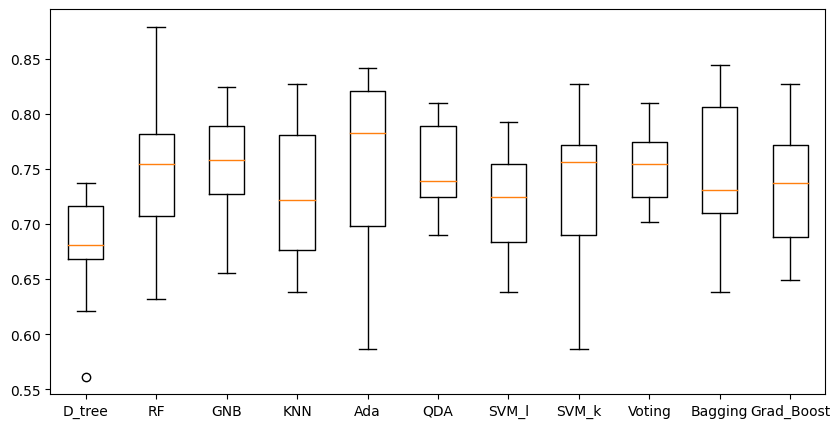

In [78]:
plt.figure(figsize=(10,5))
plt.ylim([60,80])
plt.bar(list_model_names, list_model_means)

fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.boxplot(list_model_accuracies)
ax.set_xticklabels(list_model_names)
plt.show()